# Feedforward Neural Network

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class Affine:
    def __init__(self,m,n):
        self.W = np.random.rand(m,n)
        self.b = np.random.rand(1,n)

    def forward(self,x):
        self.x = x
        return x@self.W+self.b

    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

    def backward(self,grad):
        self.dW = self.x.T@grad
        self.db = np.sum(grad, axis=0)
        dx = grad@self.W.T
        return dx   

In [3]:
class Softmax:
    def forward(self,x):
        x = x - np.max(x,axis=1).reshape(-1,1)
        self.e_x = np.exp(x)
        self.sum = np.sum(self.e_x,axis=1).reshape(-1,1)
        return self.e_x/self.sum

    def backward(self,grad):
        return grad*(self.e_x*self.sum-self.e_x**2)/self.sum**2

In [4]:
class MSELoss:
    def forward(self,pred,true):
        m = len(pred)
        self.pred = pred
        self.true = true
        return np.sum((pred-true)**2)/m
    
    def backward(self):
        return self.pred-self.true

In [29]:
class Model:
    def __init__(self,m,n,lr=.001):
        self.lr = lr
        # self.affine1 = Affine(m,96)
        # self.affine2 = Affine(96,n)
        self.affine = Affine(m,n)
        self.softmax = Softmax()

    def forward(self,x):
        # x = self.affine1.forward(x)
        # x = self.affine2.forward(x)
        x = self.affine.forward(x)
        self.y = self.softmax.forward(x)
        return self.y

    def backward(self,grad):
        grad = self.softmax.backward(grad)
        # grad = self.affine2.backward(grad)
        # grad = self.affine1.backward(grad)
        # self.affine2.update(self.lr)
        # self.affine1.update(self.lr)
        grad = self.affine.backward(grad)
        self.affine.update(self.lr)
        return grad

In [6]:
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
y = dataset.target.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder,StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = encoder.fit_transform(y).toarray()

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

epoch: 0,loss: 1.2122005162894534
epoch: 25,loss: 0.3630510114279334
epoch: 50,loss: 0.1616197376875554
epoch: 75,loss: 0.11615547802847144
epoch: 100,loss: 0.09390251708413444
epoch: 125,loss: 0.07891431051151372
epoch: 150,loss: 0.06915800373673692
epoch: 175,loss: 0.06216644945924375
epoch: 200,loss: 0.05633549449443081
epoch: 225,loss: 0.052076446373109604
epoch: 250,loss: 0.04854945545467301
epoch: 275,loss: 0.04557138245982831
epoch: 300,loss: 0.043016071448160366
epoch: 325,loss: 0.04079081133204839
epoch: 350,loss: 0.038826691255869746
epoch: 375,loss: 0.03707225043301479
epoch: 400,loss: 0.03548835351384052
epoch: 425,loss: 0.03404432803216086
epoch: 450,loss: 0.03271543457159859
epoch: 475,loss: 0.03148138162387027
epoch: 500,loss: 0.0303254818739215
epoch: 525,loss: 0.029234141040379424
epoch: 550,loss: 0.02819648036125021
epoch: 575,loss: 0.027203922025785178
epoch: 600,loss: 0.02624956922864264
epoch: 625,loss: 0.025327475843084136
epoch: 650,loss: 0.02443261889490309
epoc

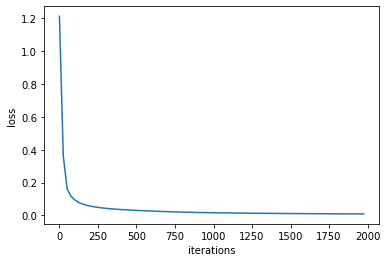

In [42]:
model = Model(64,10)
mseloss = MSELoss()

epoches = 2000
iteration = []
losses = []
for i in range(epoches):
    y_pred = model.forward(X_train)
    loss = mseloss.forward(y_pred,y_train)

    assert not np.isnan(loss)
    if i % 25 is 0:
        print(f'epoch: {i},loss: {loss}')
        iteration.append(i)
        losses.append(loss)
    grad = mseloss.backward()
    model.backward(grad)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(iteration,losses)

In [43]:
y_pred = encoder.inverse_transform(model.forward(X_test))
y_true = encoder.inverse_transform(y_test)
result = pd.DataFrame(np.hstack((y_pred,y_true)),columns=['pred','true'])
result

,pred,true
0,5,5
1,6,6
2,1,1
3,5,5
4,3,3
...,...,...
445,7,7
446,8,8
447,3,3
448,4,4


In [44]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_true,y_pred),2)

0.96